In [1]:
import pandas as pd
import tensorflow as tf
import keras as keras

In [2]:
import xarray as xr
ds = xr.open_dataset('inter-999-interpol.nc')
df = ds.to_dataframe()

In [3]:
df.index = pd.to_datetime(df.index)
df.dropna(subset = ["blizzard"], inplace=True)
df

tempr      ap     ws      wd     rh  blizzard
obstime                                                           
2016-06-02 00:00:00 -13.58  966.75  15.42   76.03  49.40       0.0
2016-06-02 01:00:00 -13.95  966.69  14.87   77.85  50.22       0.0
2016-06-02 02:00:00 -13.96  966.83  13.08   77.47  49.27       0.0
2016-06-02 03:00:00 -14.16  967.02  12.83   78.15  49.02       0.0
2016-06-02 04:00:00 -14.49  967.24  13.35   79.85  49.33       0.0
...                    ...     ...    ...     ...    ...       ...
2019-06-19 19:00:00 -26.06  985.45   9.87  178.30  68.47       0.0
2019-06-19 20:00:00 -26.10  986.18   9.72  181.10  68.88       0.0
2019-06-19 21:00:00 -26.75  986.89   9.52  178.45  66.32       0.0
2019-06-19 22:00:00 -27.64  987.76  10.82  187.17  64.92       0.0
2019-06-19 23:00:00 -27.46  988.86  12.74  190.50  61.88       0.0

[26024 rows x 6 columns]

In [4]:
mf = df
mf.drop("blizzard", axis=1).apply(lambda x: x.corr(df.blizzard))


tempr    0.046613
ap      -0.208907
ws       0.365834
wd      -0.097133
rh       0.272854
dtype: float64

In [5]:
df_features=df.iloc[:, 0:5 ]

df_target=df.iloc[8:,5:]

df_features



tempr      ap     ws      wd     rh
obstime                                                 
2016-06-02 00:00:00 -13.58  966.75  15.42   76.03  49.40
2016-06-02 01:00:00 -13.95  966.69  14.87   77.85  50.22
2016-06-02 02:00:00 -13.96  966.83  13.08   77.47  49.27
2016-06-02 03:00:00 -14.16  967.02  12.83   78.15  49.02
2016-06-02 04:00:00 -14.49  967.24  13.35   79.85  49.33
...                    ...     ...    ...     ...    ...
2019-06-19 19:00:00 -26.06  985.45   9.87  178.30  68.47
2019-06-19 20:00:00 -26.10  986.18   9.72  181.10  68.88
2019-06-19 21:00:00 -26.75  986.89   9.52  178.45  66.32
2019-06-19 22:00:00 -27.64  987.76  10.82  187.17  64.92
2019-06-19 23:00:00 -27.46  988.86  12.74  190.50  61.88

[26024 rows x 5 columns]

c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


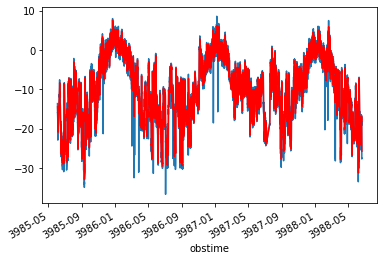

tempr          ap         ws         wd         rh
obstime                                                                    
2016-06-02 00:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 01:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 02:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 03:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 04:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 05:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 06:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 07:00:00        NaN         NaN        NaN        NaN        NaN
2016-06-02 08:00:00 -14.414444  967.136667  13.358889  77.498889  48.327778
2016-06-02 09:00:00 -14.601111  967.284444  12.868889  77.601111  48.086667
2016-06-02 10:00:00 -14.752222  967.474444  12.547778  77.693333  47.756667
2016-06-02 11:00:00 -14.918889  967.661111  12.294444  77.580000  47.547778
2016-06-02 12:00:00 -15.081111  967.832222  12.123333  77.498889  47.458889
2016-06-02 13:00:00 -15.217778  967.974444  11.840000  77.295556  47.357778
2016-06-02 14:00:00 -15.344444  968.150000  11.610000  77.062222  47.372222
2016-06-02 15:00:00 -15.448889  968.340000  11.354444  76.603333  47.167778
2016-06-02 16:00:00 -15.546667  968.511111  11.157778  75.901111  47.068889
2016-06-02 17:00:00 -15.622222  968.670000  11.126667  74.634444  46.988889
2016-06-02 18:00:00 -15.672222  968.787778  11.467778  71.834444  47.155556
2016-06-02 19:00:00 -15.724444  968.880000  11.750000  68.606667  47.391111

In [6]:
from matplotlib import pyplot
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# Tail-rolling average transform
rolling = df_features.rolling(window=9)
rolling_mean = rolling.mean()
# rolling_mean_X_test = rolling_X_test.mean()
# plot original and transformed dataset
df_features['tempr'].plot()
rolling_mean['tempr'].plot(color='red')
pyplot.show()
rolling_mean[0:20]

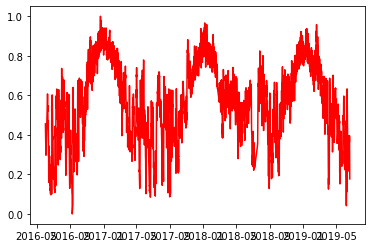

In [7]:
# minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_Data = scalar.fit_transform(rolling_mean)

y = scaled_Data[:,0]
new = rolling_mean
x = new.index
pyplot.plot(x, y, color = 'r')
# plt.show()
pyplot.show()

In [8]:
import numpy as np
scaled_Data[0,:]

array([nan, nan, nan, nan, nan])

In [9]:
import numpy as np
scaled_Data = scaled_Data[~np.isnan(scaled_Data).any(axis=1)]
from sklearn import preprocessing
normalized_data = preprocessing.normalize(scaled_Data)

In [10]:
nxt = normalized_data
nxt


array([[0.56656698, 0.61704962, 0.28577881, 0.26908945, 0.37970116],
       [0.56454886, 0.62309225, 0.27645771, 0.27133022, 0.37814241],
       [0.56272309, 0.62878348, 0.27047709, 0.27312485, 0.3744583 ],
       ...,
       [0.1943131 , 0.67426883, 0.09216478, 0.46572531, 0.53123399],
       [0.17943416, 0.66045353, 0.10099434, 0.50968883, 0.51148994],
       [0.16557904, 0.64625799, 0.11443834, 0.53963156, 0.50063543]])

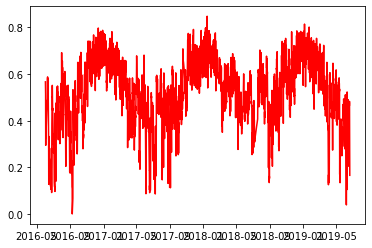

In [11]:
y = normalized_data[:,0]
new = rolling_mean.iloc[8:]
x = new.index
pyplot.plot(x, y, color = 'r')
# plt.show()
pyplot.show()

In [12]:
# FOR TEMPERATURE
tempr = nxt[:,0]
tempr.shape
tempr = np.array(tempr)
tempr2 = np.insert(df_target.values, 0, tempr, axis=1)
# df_target.values.shape
# tempr.shape
tempr2

array([[0.56656698, 0.        ],
       [0.56454886, 0.        ],
       [0.56272309, 0.        ],
       ...,
       [0.1943131 , 0.        ],
       [0.17943416, 0.        ],
       [0.16557904, 0.        ]])

In [13]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [14]:
n_steps=7
X, y = split_sequences(tempr2, n_steps)
X, y

(array([[[0.56656698, 0.        ],
         [0.56454886, 0.        ],
         [0.56272309, 0.        ],
         ...,
         [0.55664148, 0.        ],
         [0.55444642, 0.        ],
         [0.55170171, 0.        ]],
 
        [[0.56454886, 0.        ],
         [0.56272309, 0.        ],
         [0.55998937, 0.        ],
         ...,
         [0.55444642, 0.        ],
         [0.55170171, 0.        ],
         [0.5503493 , 0.        ]],
 
        [[0.56272309, 0.        ],
         [0.55998937, 0.        ],
         [0.55664148, 0.        ],
         ...,
         [0.55170171, 0.        ],
         [0.5503493 , 0.        ],
         [0.5488055 , 0.        ]],
 
        ...,
 
        [[0.2546518 , 0.        ],
         [0.23939935, 0.        ],
         [0.23301251, 0.        ],
         ...,
         [0.21889853, 0.        ],
         [0.20672727, 0.        ],
         [0.1943131 , 0.        ]],
 
        [[0.23939935, 0.        ],
         [0.23301251, 0.        ],
       

In [15]:
X.shape

(26010, 7, 2)

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)

import keras.layers as KL
# for single layer

inputs = KL.Input(shape=(n_steps,2))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

import focal_loss
from focal_loss import BinaryFocalLoss

model = keras.models.Model(inputs, outputs)
opt = keras.optimizers.Adamax() 
model.compile( optimizer=opt , loss=BinaryFocalLoss(gamma = 2), metrics = ['accuracy'])
history = model.fit(X_train,y_train, batch_size=16, epochs=100, validation_split=0.3,class_weight={0:1, 1:3})


Epoch 1/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0791 - accuracy: 0.9716 - val_loss: 0.0223 - val_accuracy: 0.9779
Epoch 2/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0362 - accuracy: 0.9780 - val_loss: 0.0128 - val_accuracy: 0.9779
Epoch 3/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0231 - accuracy: 0.9873 - val_loss: 0.0092 - val_accuracy: 0.9905
Epoch 4/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9914 - val_loss: 0.0083 - val_accuracy: 0.9910
Epoch 5/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0134 - accuracy: 0.9914 - val_loss: 0.0087 - val_accuracy: 0.9914
Epoch 6/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0123 - accuracy: 0.9927 - val_loss: 0.0071 - val_accuracy: 0.9914
Epoch 7/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0114 - accuracy: 0.9925 - val_loss: 0.0073 - val_accuracy: 0.9916

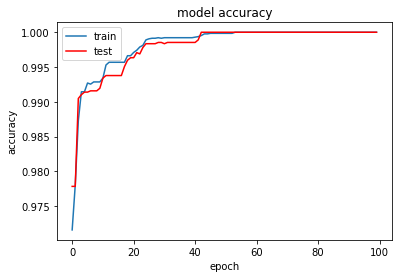

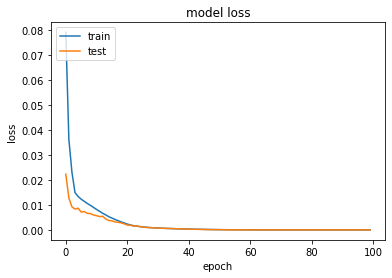

In [17]:
# TEMPERATURE
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Negative (Actual)'), Text(0, 1.5, 'Positive (Actual)')])

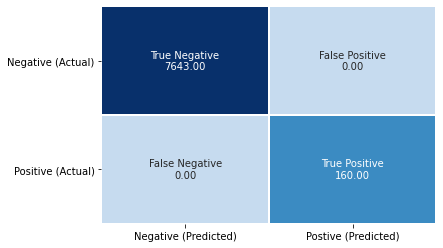

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error
predicted_value = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,predicted_value ))
predicted_value=[1 if y>=0.6 else 0 for y in predicted_value]

confudf = pd.DataFrame(confusion_matrix(y_test,predicted_value), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,predicted_value).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)


In [19]:
a =[0]*5
r = [0]*5
r[0] = round(rmse,10)
a[0]= history.history['val_accuracy'][-1]

In [20]:
# Similarly for other factors 
Air_pressure = np.insert(df_target.values, 0, nxt[:,1], axis=1)
Wind_speed = np.insert(df_target.values, 0, nxt[:,2], axis=1)
Wind_direction = np.insert(df_target.values, 0, nxt[:,3], axis=1)
Relative_humidity = np.insert(df_target.values, 0, nxt[:,4], axis=1)

In [21]:
# Air pressure 
# Getting the data after taking 7 step lookback
X, y = split_sequences(Air_pressure, n_steps)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)           
import keras.layers as KL

inputs = KL.Input(shape=(n_steps,2))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

model = keras.models.Model(inputs, outputs)
opt = keras.optimizers.Adamax() 
model.compile( optimizer=opt , loss=BinaryFocalLoss(gamma = 2), metrics = ['accuracy'])
history = model.fit(X_train,y_train, batch_size=16, epochs=100, validation_split=0.3,  class_weight={0:1, 1:3})


Epoch 1/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0121 - val_accuracy: 0.9910
Epoch 2/100
797/797 [==============================] - 3s 3ms/step - loss: 0.0148 - accuracy: 0.9918 - val_loss: 0.0089 - val_accuracy: 0.9919
Epoch 3/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0124 - accuracy: 0.9928 - val_loss: 0.0074 - val_accuracy: 0.9919
Epoch 4/100
797/797 [==============================] - 3s 3ms/step - loss: 0.0107 - accuracy: 0.9930 - val_loss: 0.0067 - val_accuracy: 0.9927
Epoch 5/100
797/797 [==============================] - 4s 4ms/step - loss: 0.0093 - accuracy: 0.9940 - val_loss: 0.0058 - val_accuracy: 0.9934
Epoch 6/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0081 - accuracy: 0.9948 - val_loss: 0.0051 - val_accuracy: 0.9936
Epoch 7/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0071 - accuracy: 0.9951 - val_loss: 0.0045 - val_accuracy: 0.9941

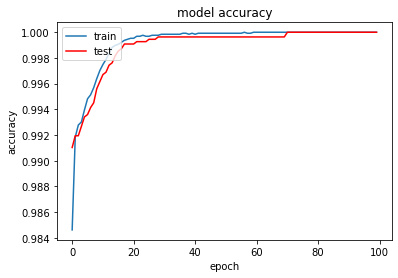

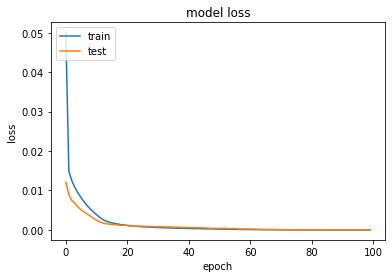

In [22]:
# AIR PRESSURE
a[1]= history.history['val_accuracy'][-1]
predicted_value = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,predicted_value ))
r[1] = round(rmse,10)
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Negative (Actual)'), Text(0, 1.5, 'Positive (Actual)')])

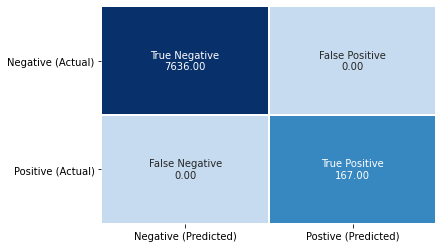

In [23]:
predicted_value=[1 if y>=0.6 else 0 for y in predicted_value]

confudf = pd.DataFrame(confusion_matrix(y_test,predicted_value), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,predicted_value).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)


In [24]:
X, y = split_sequences(Wind_speed, n_steps)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)           
import keras.layers as KL

inputs = KL.Input(shape=(n_steps,2))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

model = keras.models.Model(inputs, outputs)
opt = keras.optimizers.Adamax() 
model.compile( optimizer=opt , loss=BinaryFocalLoss(gamma = 2), metrics = ['accuracy'])
history = model.fit(X_train,y_train, batch_size=16, epochs=100, validation_split=0.3,  class_weight={0:1, 1:3})


Epoch 1/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0589 - accuracy: 0.9721 - val_loss: 0.0104 - val_accuracy: 0.9934
Epoch 2/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9916 - val_loss: 0.0084 - val_accuracy: 0.9930
Epoch 3/100
797/797 [==============================] - 4s 4ms/step - loss: 0.0131 - accuracy: 0.9922 - val_loss: 0.0068 - val_accuracy: 0.9930
Epoch 4/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0116 - accuracy: 0.9923 - val_loss: 0.0064 - val_accuracy: 0.9941
Epoch 5/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0105 - accuracy: 0.9930 - val_loss: 0.0056 - val_accuracy: 0.9945
Epoch 6/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0094 - accuracy: 0.9934 - val_loss: 0.0054 - val_accuracy: 0.9945
Epoch 7/100
797/797 [==============================] - 4s 4ms/step - loss: 0.0084 - accuracy: 0.9934 - val_loss: 0.0046 - val_accuracy: 0.9945

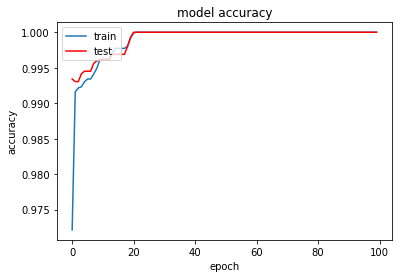

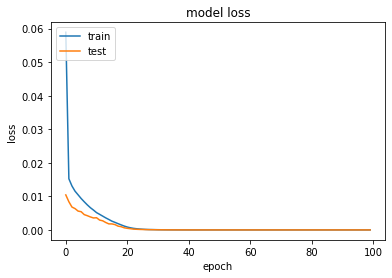

In [25]:
# WIND SPEED
a[2]= history.history['val_accuracy'][-1]
predicted_value = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,predicted_value ))
r[2] = round(rmse,10)
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Negative (Actual)'), Text(0, 1.5, 'Positive (Actual)')])

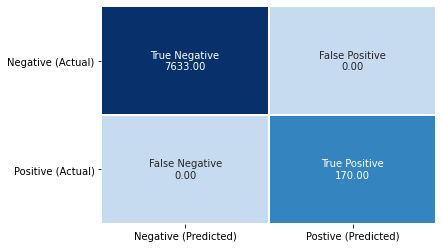

In [26]:
predicted_value=[1 if y>=0.6 else 0 for y in predicted_value]

confudf = pd.DataFrame(confusion_matrix(y_test,predicted_value), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,predicted_value).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)


In [27]:
X, y = split_sequences(Wind_direction, n_steps)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)           
import keras.layers as KL

inputs = KL.Input(shape=(n_steps,2))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

model = keras.models.Model(inputs, outputs)
opt = keras.optimizers.Adamax() 
model.compile( optimizer=opt , loss=BinaryFocalLoss(gamma = 2), metrics = ['accuracy'])
history = model.fit(X_train,y_train, batch_size=16, epochs=100, validation_split=0.3,  class_weight={0:1, 1:3})


Epoch 1/100
797/797 [==============================] - 5s 6ms/step - loss: 0.0721 - accuracy: 0.9839 - val_loss: 0.0100 - val_accuracy: 0.9951
Epoch 2/100
797/797 [==============================] - 3s 3ms/step - loss: 0.0120 - accuracy: 0.9938 - val_loss: 0.0049 - val_accuracy: 0.9951
Epoch 3/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0098 - accuracy: 0.9947 - val_loss: 0.0039 - val_accuracy: 0.9967
Epoch 4/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0085 - accuracy: 0.9959 - val_loss: 0.0035 - val_accuracy: 0.9969
Epoch 5/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0075 - accuracy: 0.9961 - val_loss: 0.0031 - val_accuracy: 0.9980
Epoch 6/100
797/797 [==============================] - 3s 3ms/step - loss: 0.0065 - accuracy: 0.9965 - val_loss: 0.0024 - val_accuracy: 0.9984
Epoch 7/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0056 - accuracy: 0.9969 - val_loss: 0.0021 - val_accuracy: 0.9987

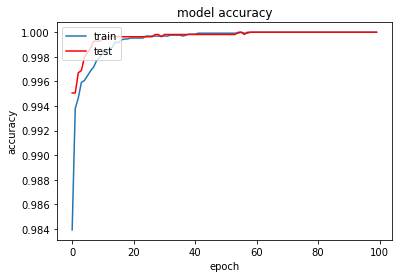

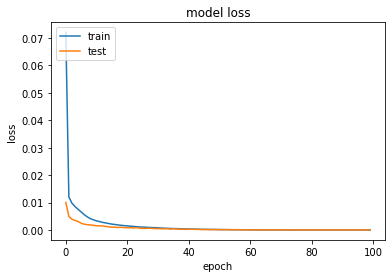

In [28]:
# WIND DIRECTION 
a[3]= history.history['val_accuracy'][-1]
predicted_value = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,predicted_value ))
r[3] = round(rmse,10)
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Negative (Actual)'), Text(0, 1.5, 'Positive (Actual)')])

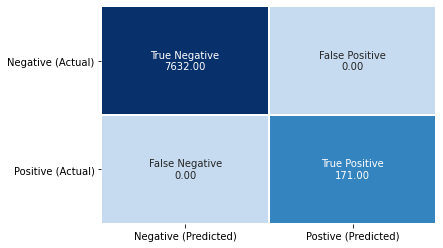

In [29]:
predicted_value=[1 if y>=0.6 else 0 for y in predicted_value]

confudf = pd.DataFrame(confusion_matrix(y_test,predicted_value), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,predicted_value).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)


In [30]:
X, y = split_sequences(Relative_humidity, n_steps)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)           
import keras.layers as KL

inputs = KL.Input(shape=(n_steps,2))
x = KL.LSTM(units = 8, activation = 'relu')(inputs)
outputs = KL.Dense(units=1, activation= 'sigmoid')(x)

model = keras.models.Model(inputs, outputs)
opt = keras.optimizers.Adamax() 
model.compile( optimizer=opt , loss=BinaryFocalLoss(gamma = 2), metrics = ['accuracy'])
history = model.fit(X_train,y_train, batch_size=16, epochs=100, validation_split=0.3,  class_weight={0:1, 1:3})


Epoch 1/100
797/797 [==============================] - 3s 3ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0131 - val_accuracy: 0.9932
Epoch 2/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.0096 - val_accuracy: 0.9943
Epoch 3/100
797/797 [==============================] - 2s 3ms/step - loss: 0.0162 - accuracy: 0.9937 - val_loss: 0.0081 - val_accuracy: 0.9949
Epoch 4/100
797/797 [==============================] - 4s 5ms/step - loss: 0.0135 - accuracy: 0.9944 - val_loss: 0.0065 - val_accuracy: 0.9954
Epoch 5/100
797/797 [==============================] - 3s 3ms/step - loss: 0.0115 - accuracy: 0.9951 - val_loss: 0.0056 - val_accuracy: 0.9960
Epoch 6/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0095 - accuracy: 0.9953 - val_loss: 0.0048 - val_accuracy: 0.9960
Epoch 7/100
797/797 [==============================] - 3s 4ms/step - loss: 0.0078 - accuracy: 0.9955 - val_loss: 0.0039 - val_accuracy: 0.9967

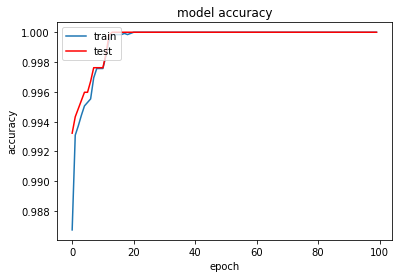

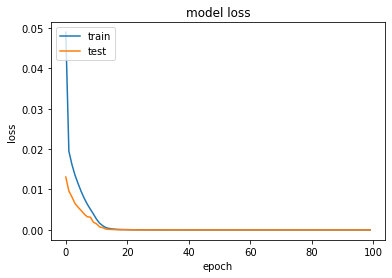

In [31]:
# RELATIVE HUMIDITY
a[4]= history.history['val_accuracy'][-1]
predicted_value = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,predicted_value ))
r[4] = round(rmse,10)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Negative (Actual)'), Text(0, 1.5, 'Positive (Actual)')])

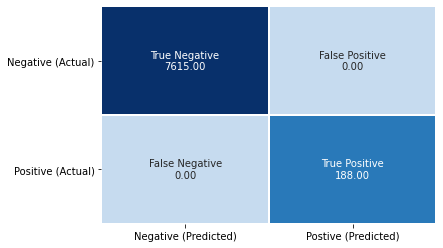

In [32]:
predicted_value=[1 if y>=0.6 else 0 for y in predicted_value]

confudf = pd.DataFrame(confusion_matrix(y_test,predicted_value), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,predicted_value).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)


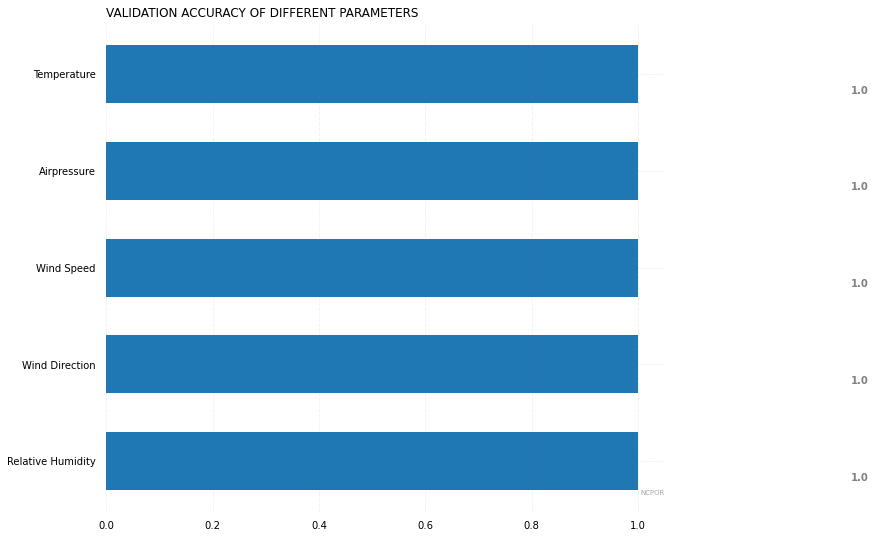

In [33]:
params = ['Temperature', 'Airpressure', 'Wind Speed', 'Wind Direction', 'Relative Humidity']
# Figure Size 
fig, ax = plt.subplots(figsize =(10, 9)) 
  
# Horizontal Bar Plot 
ax.barh(params, a, height = 0.6) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 7) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.4, i.get_y()+0.5,  
             str(round((i.get_width()), 4)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('VALIDATION ACCURACY OF DIFFERENT PARAMETERS', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'NCPOR', fontsize = 7, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
# Show Plot 
plt.show() 

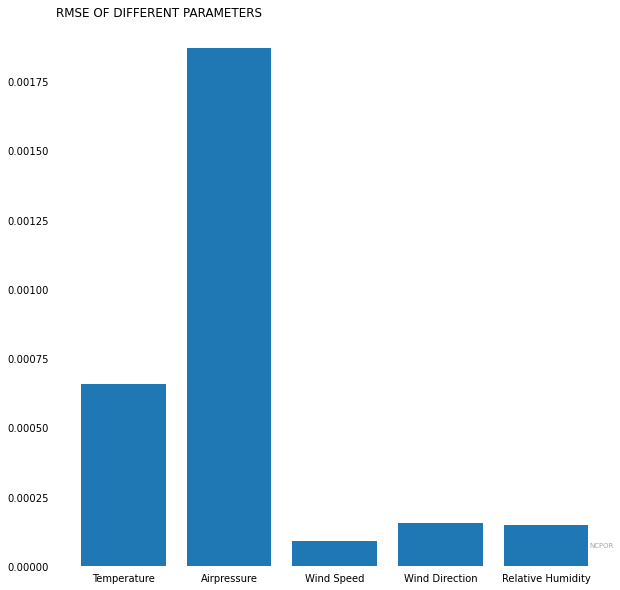

In [34]:
params = ['Temperature', 'Airpressure', 'Wind Speed', 'Wind Direction', 'Relative Humidity']
# Figure Size 
fig, ax = plt.subplots(figsize =(10, 10)) 
  
# Horizontal Bar Plot 
ax.bar(params, r) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
# ax.xaxis.set_tick_params(pad = 5) 
# ax.yaxis.set_tick_params(pad = 7) 
  
# Add x, y gridlines 
# ax.grid(b = True, color ='grey', 
#         linestyle ='-.', linewidth = 0.5, 
#         alpha = 0.2) 
  
# # Show top values  
# ax.invert_yaxis() 
  
# Add annotation to bars 
# for i in ax.patches: 
#     plt.text(i.get_width(), i.get_y(),  
#              str(round((i.get_width()), 2)), 
#              fontsize = 10, fontweight ='bold', 
#              color ='grey') 
  
# Add Plot Title 
ax.set_title('RMSE OF DIFFERENT PARAMETERS', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'NCPOR', fontsize = 7, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
# Show Plot 
plt.show() 

In [35]:
r

[0.0006554247, 0.0018690579, 8.79666e-05, 0.0001537746, 0.0001476789]

In [36]:
cr = classification_report(y_test, y_pred,output_dict=True)
cr = pd.DataFrame(cr).transpose()
cr.rename(columns={'f1-score': 'f1'}, inplace=True)
cr




NameError: name 'y_pred' is not defined

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (df_features.iloc[8:,:], df_target.values, test_size=0.3)

time_train, time_test, tyt, tyte = train_test_split (new.index, df_target.values, test_size=0.3)


In [59]:
predicted_value= np.array(predicted_value)
predicted_value = np.append(0,2)



In [61]:
predicted_value

array([0, 2])

In [46]:
# dfy=pd.DataFrame(data={ 'ws':X_test[:,2],'ap':X_test[:,1],'rh':X_test[:,4],'tempr':X_test[:,0], 'wd':X_test[:,3], 'actual':y_test.flatten(), 'pred':y_pred})
dfy=pd.DataFrame(data={ 'ws':X_test.ws,'ap':X_test.ap,'rh':X_test.rh,'tempr':X_test.tempr, 'wd':X_test.wd, 'actual':y_test.flatten(), 'pred':predicted_value})
dfy=dfy.sort_values('obstime')

ValueError: arrays must all be same length

In [183]:
dfy['result']='no'
for i in range(len(dfy)):
  if (dfy['pred'][i]==1):
    if (dfy['actual'][i]==1):
      dfy['result'][i]='correct'
    if (dfy['actual'][i]==0):
      dfy['result'][i]='incorrect'
  else:
    dfy['result'][i]='no'

c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\manisha garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [184]:
# dfy=dfy.sort_values('obstime')
dfy

ws      ap     rh  tempr      wd  actual  pred result
obstime                                                                      
2016-06-02 12:00:00  11.29  968.56  48.22 -15.62   77.42     0.0     0     no
2016-06-02 15:00:00  10.40  968.98  45.32 -15.72   72.52     0.0     0     no
2016-06-02 20:00:00  14.35  969.22  49.10 -15.85   48.68     0.0     0     no
2016-06-03 00:00:00  16.81  969.56  59.85 -16.30   47.02     0.0     0     no
2016-06-03 02:00:00   9.87  970.10  73.61 -18.02  184.90     0.0     0     no
...                    ...     ...    ...    ...     ...     ...   ...    ...
2019-06-19 12:00:00   5.72  981.50  70.02 -23.94   50.82     0.0     0     no
2019-06-19 13:00:00   4.91  982.02  67.50 -24.24   35.48     0.0     0     no
2019-06-19 18:00:00   6.55  984.59  68.72 -24.90  180.27     0.0     0     no
2019-06-19 21:00:00   9.52  986.89  66.32 -26.75  178.45     0.0     0     no
2019-06-19 23:00:00  12.74  988.86  61.88 -27.46  190.50     0.0     0     no

[7805 rows x 8 columns]

In [185]:
dfy=dfy.sort_values('obstime')
# dfy['obstime']=time_test

# dfy=dfy.sort_values('obstime')
# dfy.set_index('obstime')

In [186]:
degree_sign = u'\N{DEGREE SIGN}'
labels = {
        'tempr': 'Temperature (' + degree_sign + 'C)',
        'ap': 'Atmospheric Pressure (mbar)',
        'ws': 'Wind Speed (knots)',
        'rh': 'Relative Humidity (%)'
    }

<Figure size 1440x720 with 0 Axes>

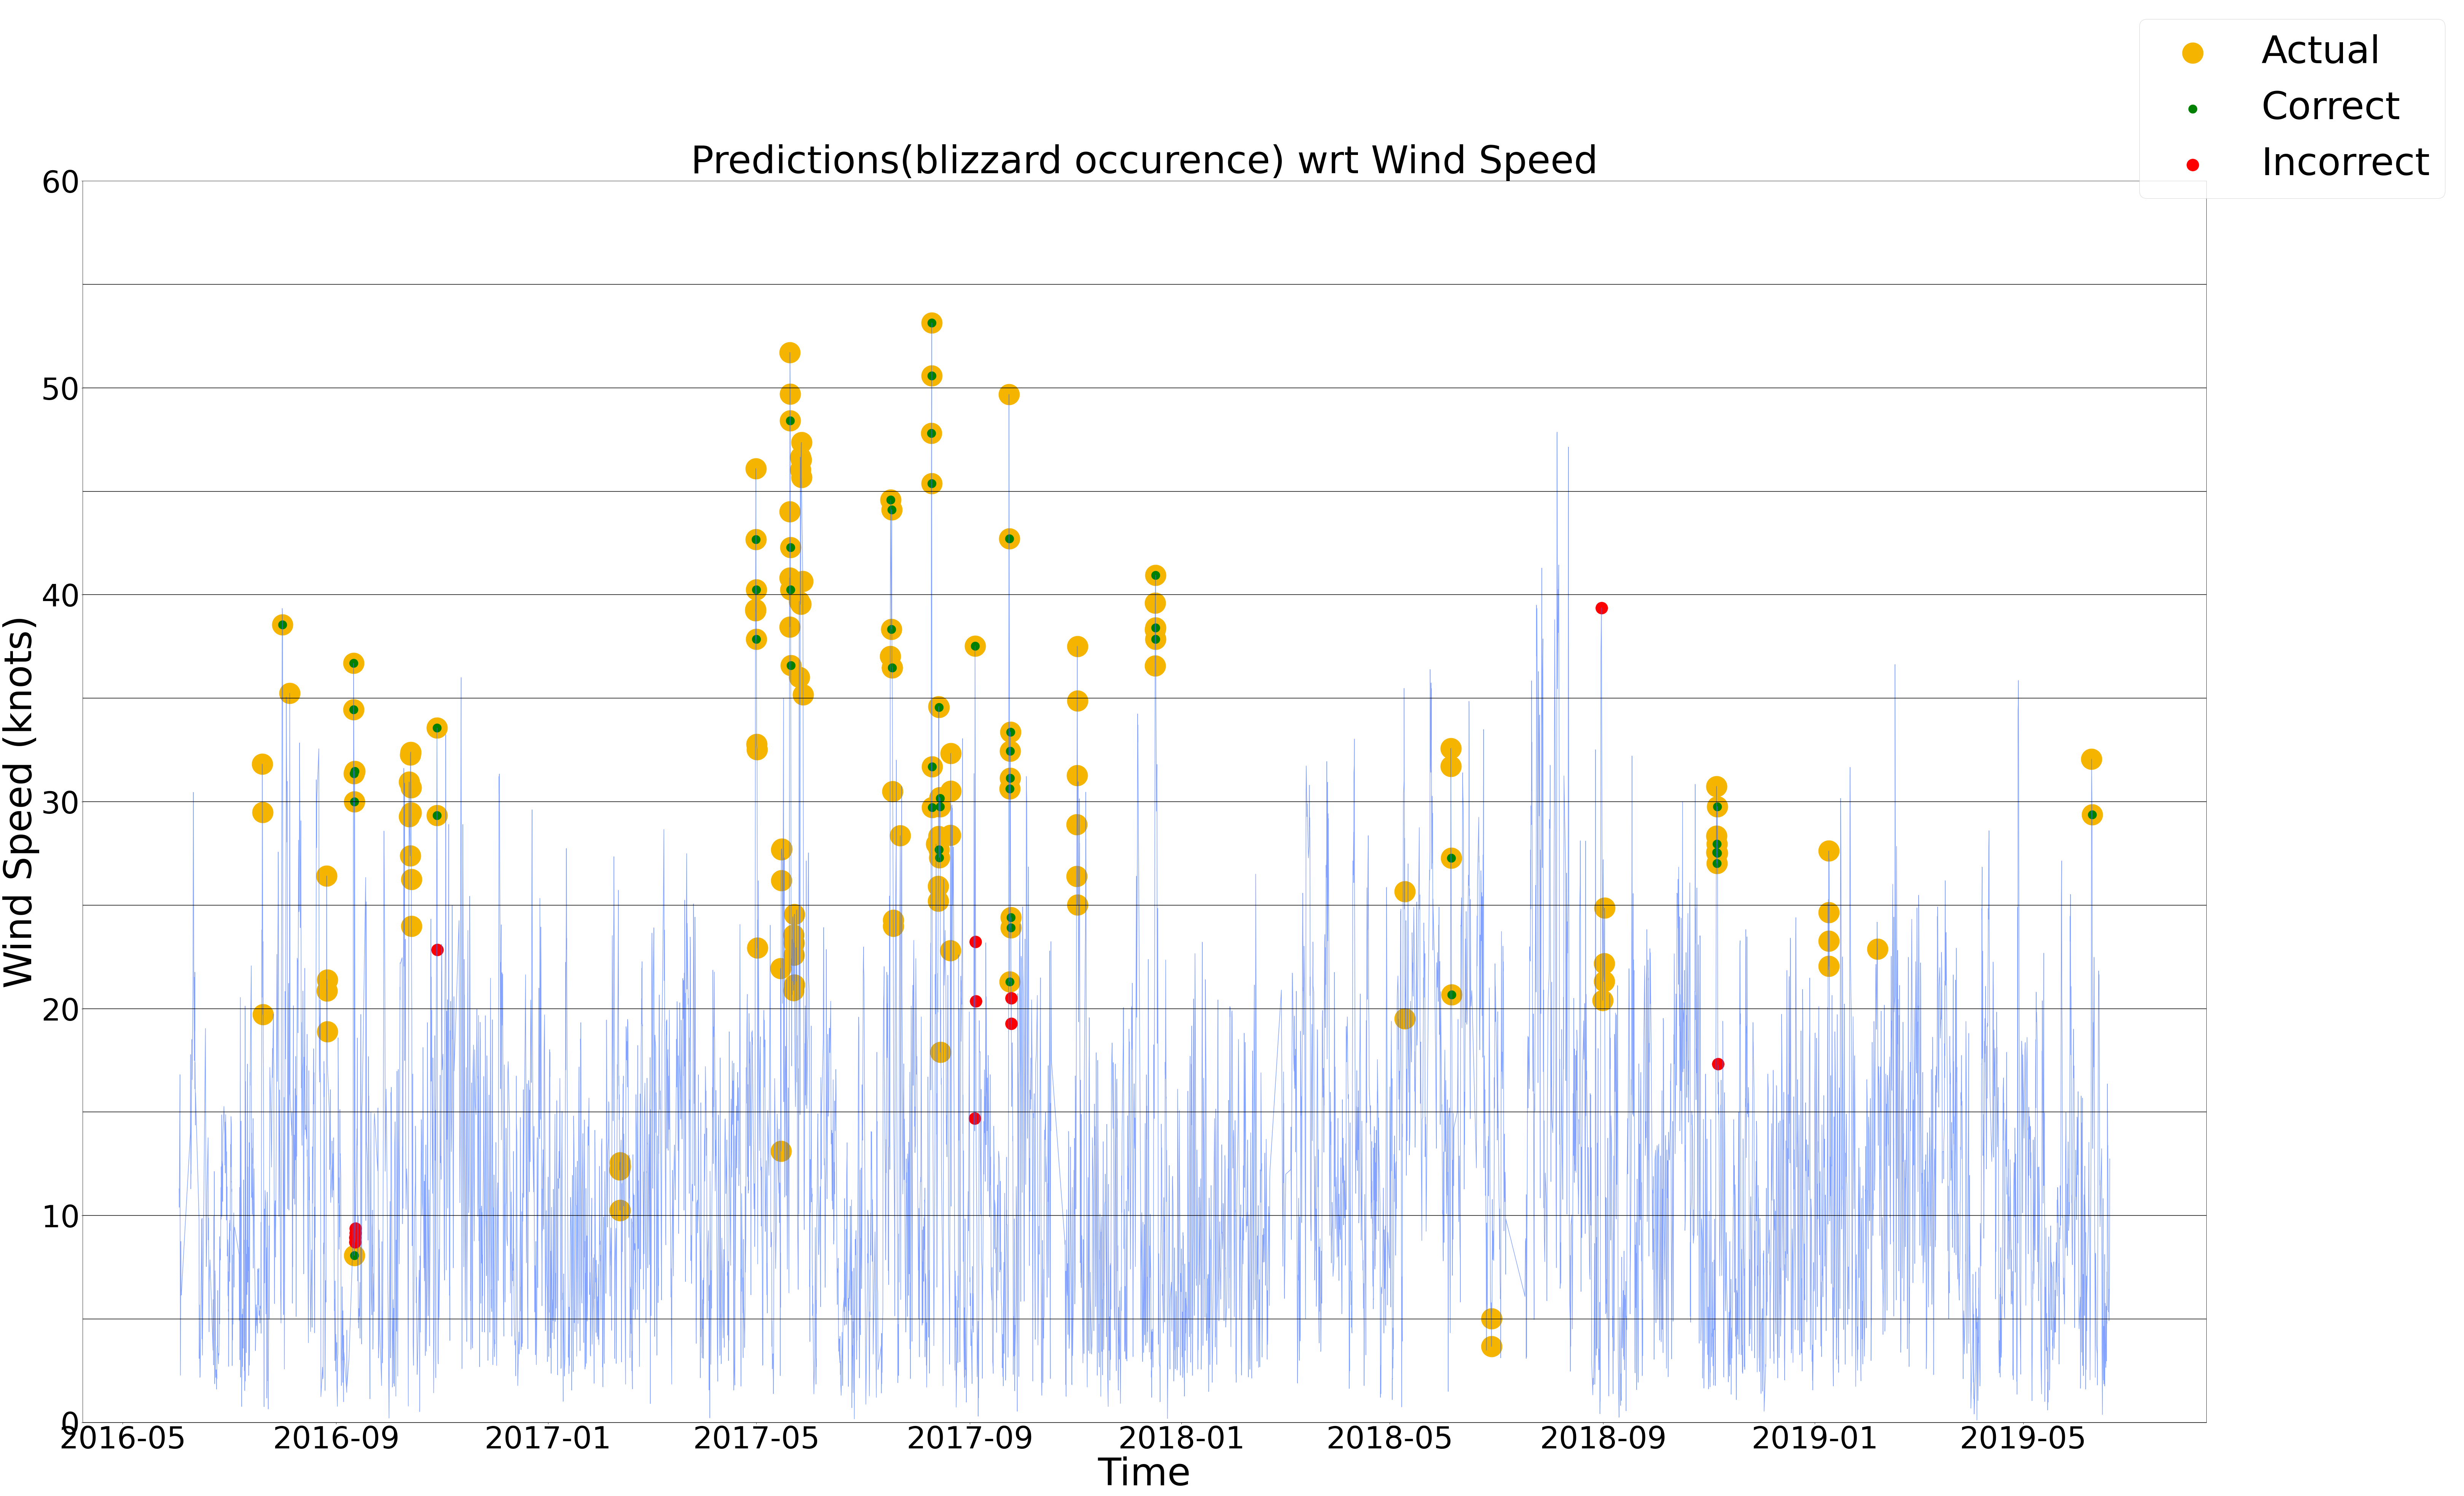

In [187]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.plot(dfy.index,dfy.ws,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['ws'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['ws'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['ws'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(0,60)

for i in range(0,60,5):
  plt.axhline(y = i, c = 'black')



fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Wind Speed', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Wind Speed (knots)', fontsize=100)

# plt.savefig('Predictions(blizzard Occurence) wrt Wind Speed (CNN).png', bbox_inches = 'tight')
plt.show()

<Figure size 1440x720 with 0 Axes>

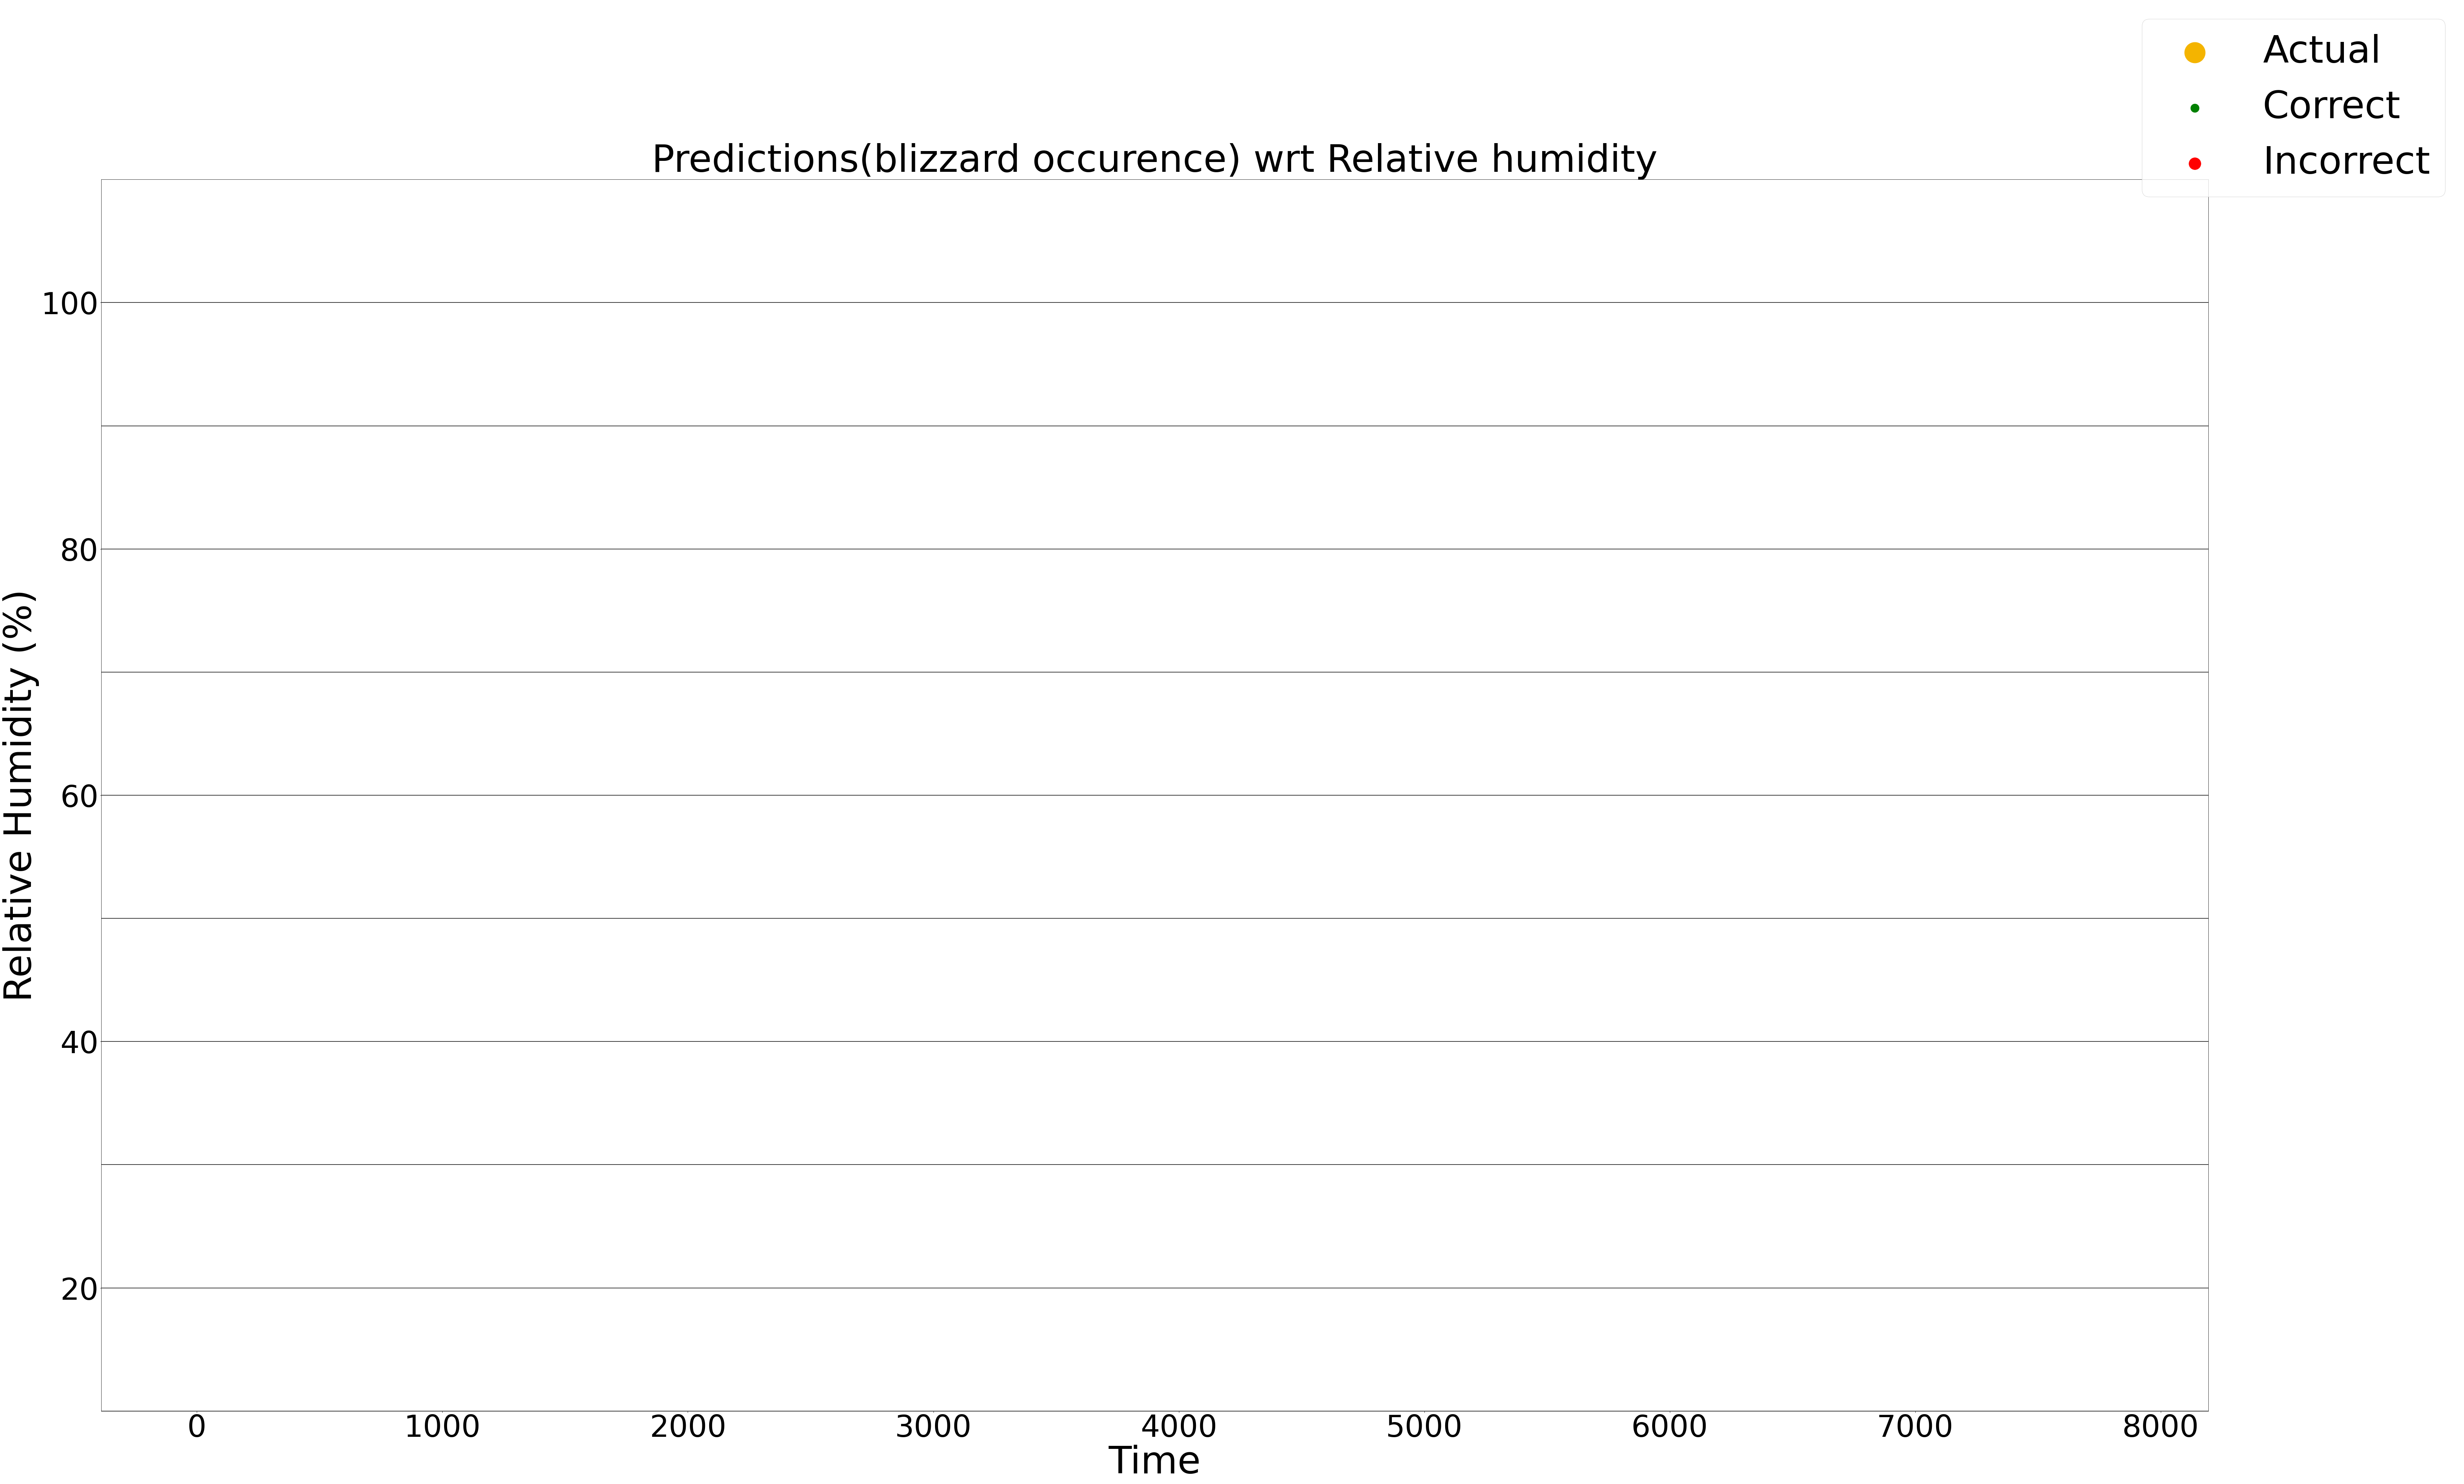

In [92]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.set_facecolor('white')

ax1.plot(dfy.index,dfy.rh,color = '#3366ff', alpha=0.8)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['rh'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['rh'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['rh'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(10,110)

for i in range(10,110,10):
    plt.axhline(y = i, c = 'black')


fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Relative humidity', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Relative Humidity (%)', fontsize=100)
#plt.savefig('Predictions(blizzard Occurence) relative humidity(RNN)(Adamax).png', bbox_inches = 'tight')
plt.show()


<Figure size 1440x720 with 0 Axes>

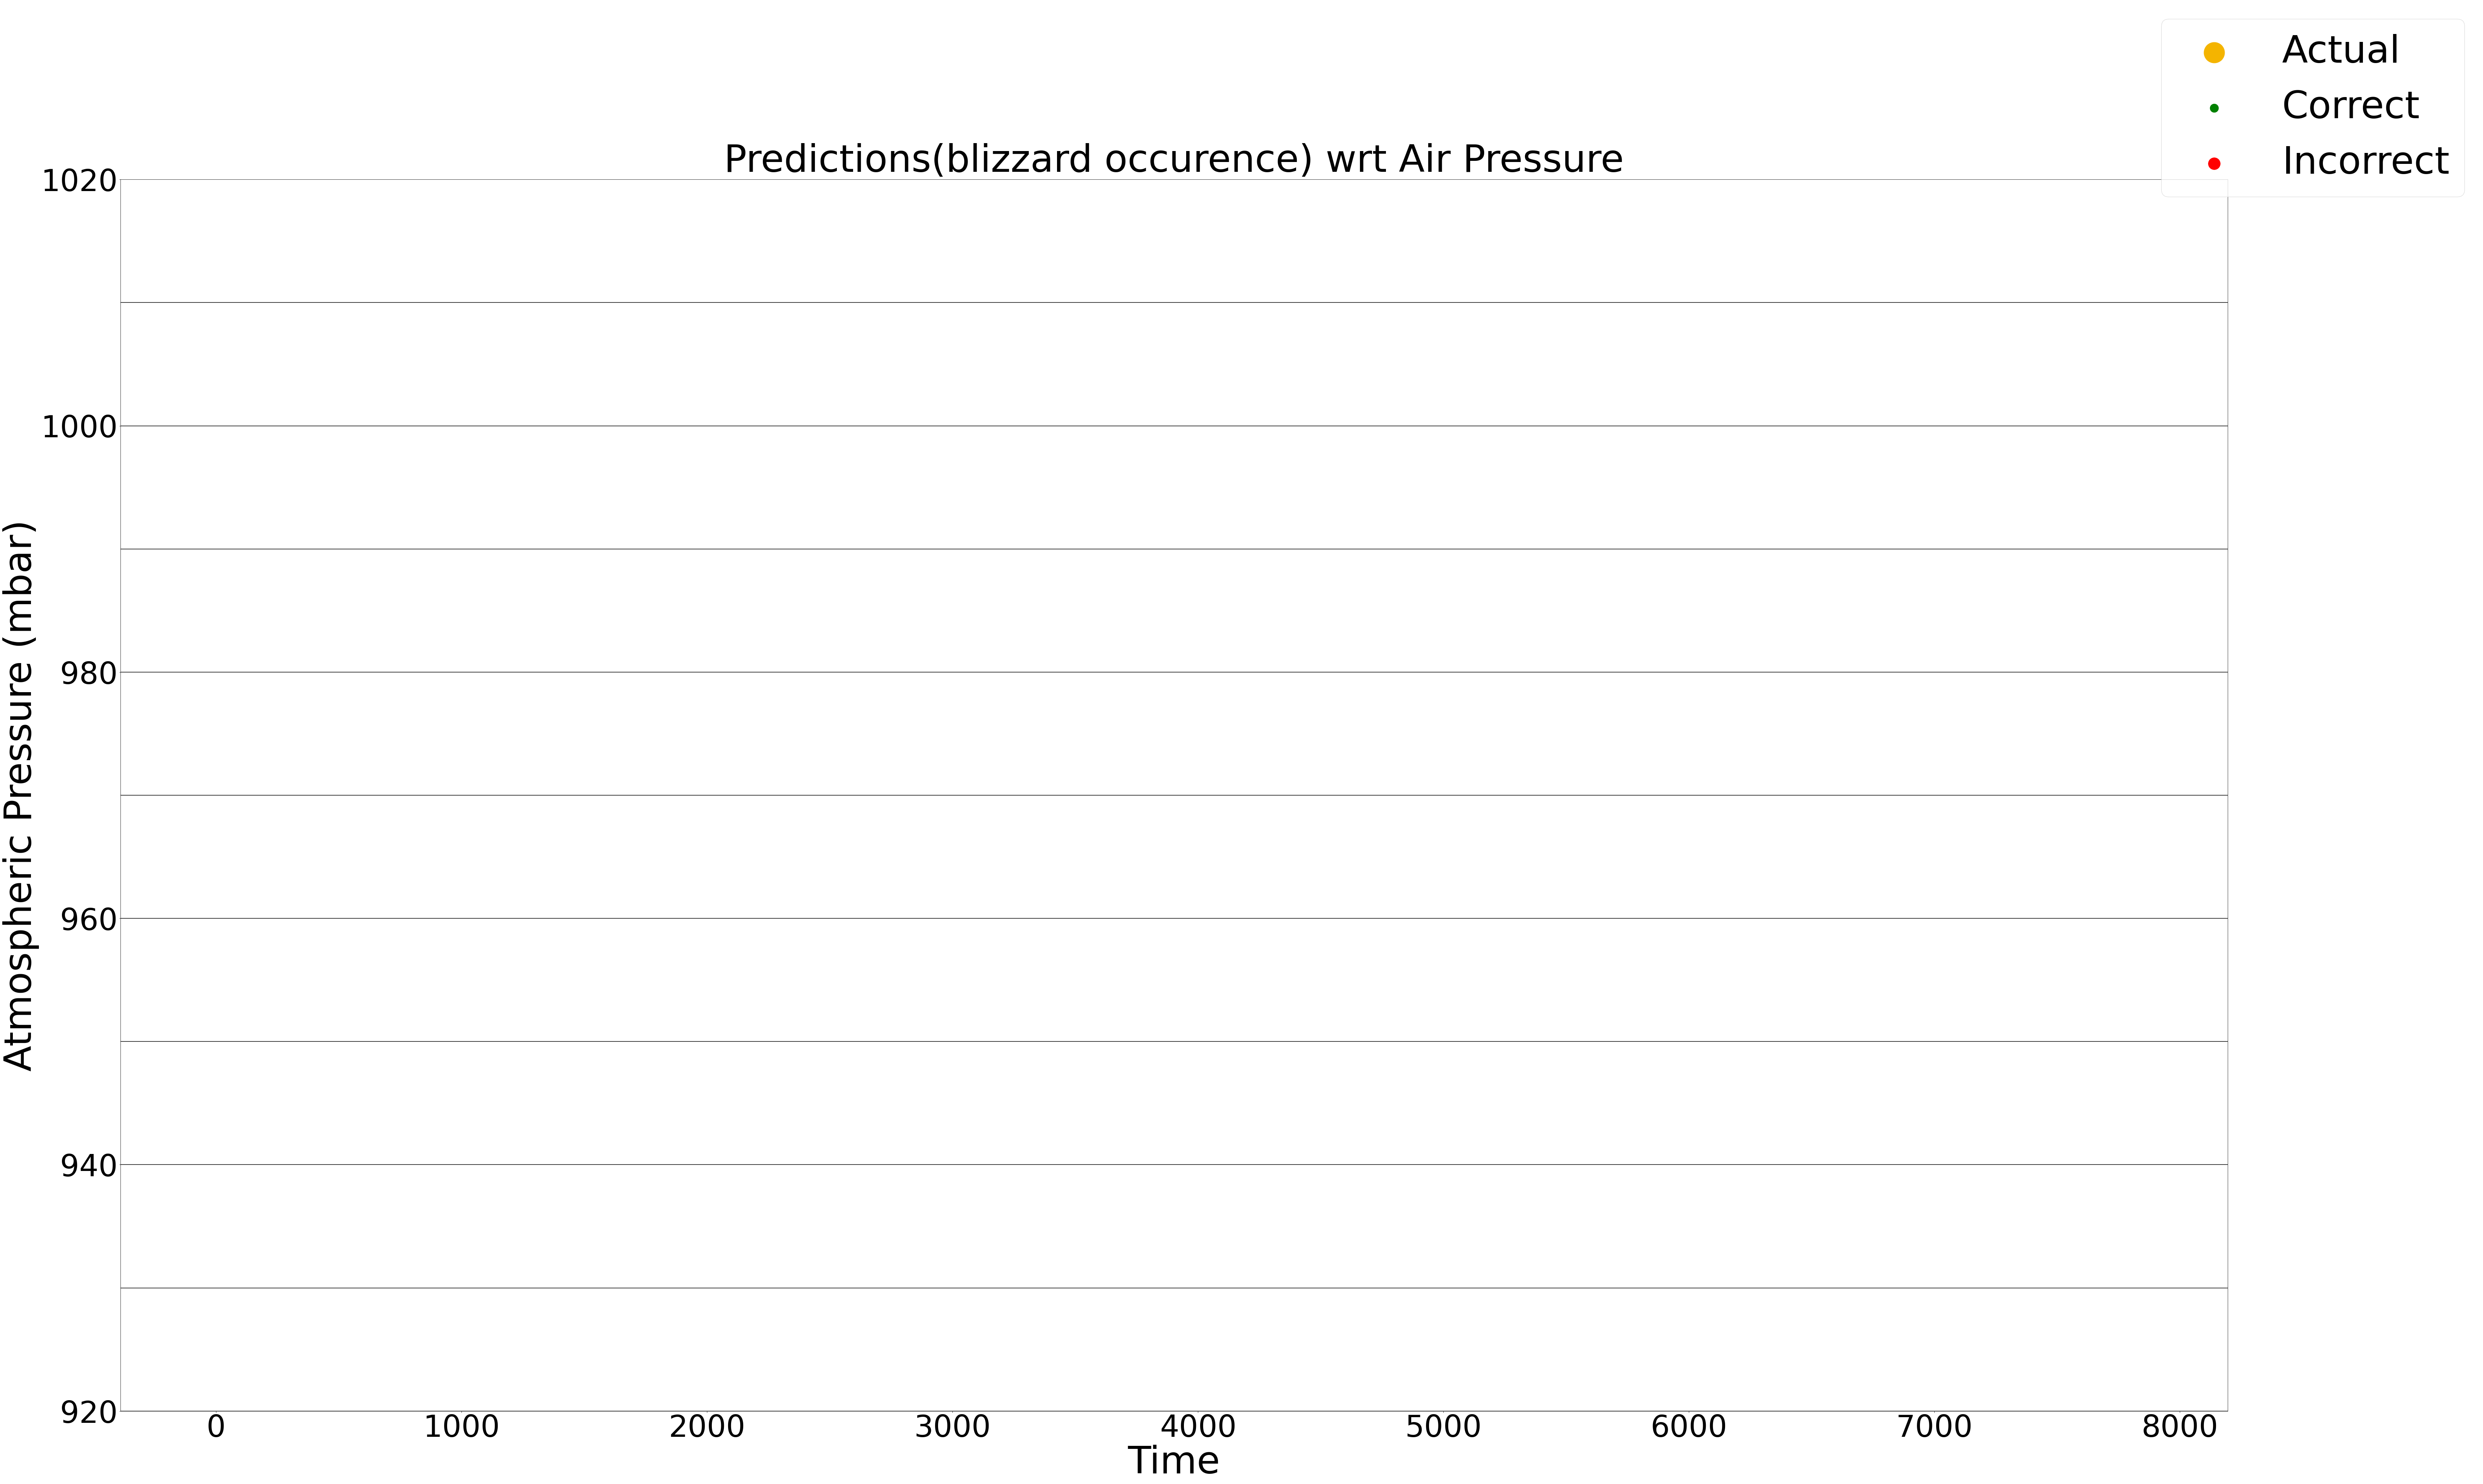

In [93]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.set_facecolor('white')

ax1.plot(dfy.index,dfy.ap,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['ap'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['ap'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['ap'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(920,1020)

for i in range(920,1020,10):
    plt.axhline(y = i, c = 'black')

fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Air Pressure', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Atmospheric Pressure (mbar)', fontsize=100)

#plt.savefig('Predictions(blizzard Occurence) wrt air pressure(RNN)(Adamax).png')

plt.show()


<Figure size 1440x720 with 0 Axes>

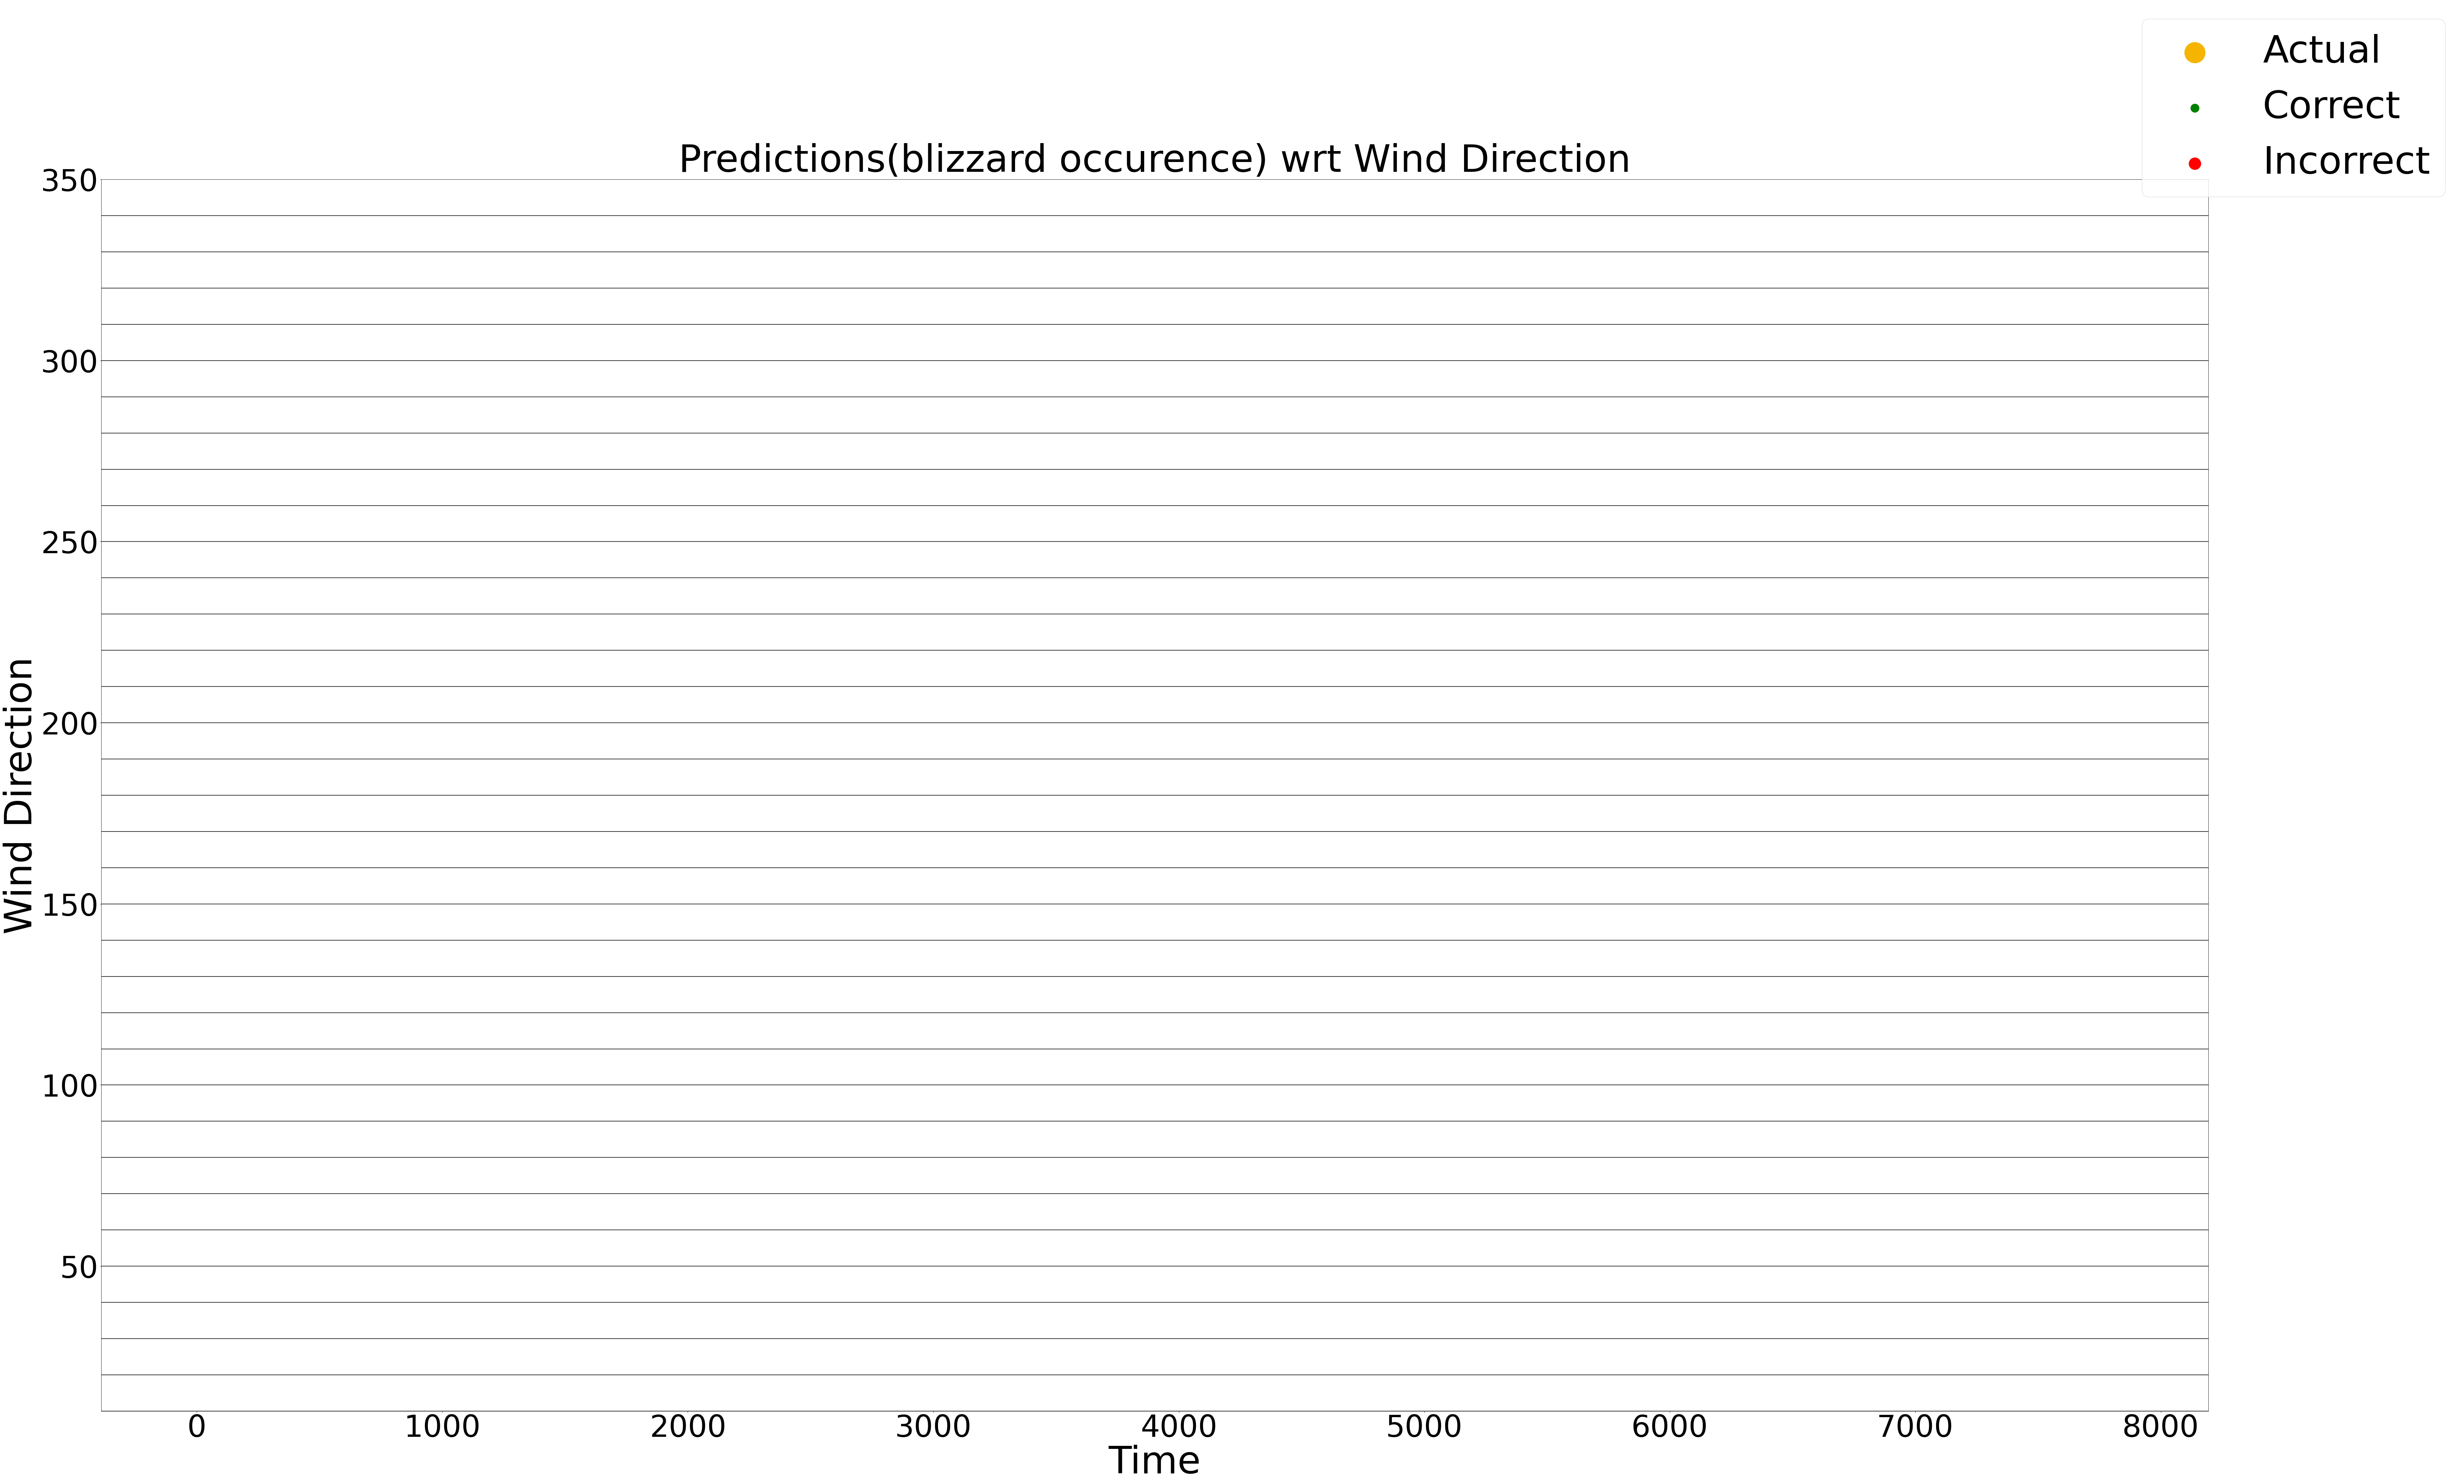

In [94]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.plot(dfy.index,dfy.wd,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['wd'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['wd'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['wd'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(10,350)

for i in range(10,350,10):
  plt.axhline(y = i, c = 'black')



fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Wind Direction', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Wind Direction', fontsize=100)

# plt.savefig('Predictions(blizzard Occurence) wrt Wind Speed (CNN).png', bbox_inches = 'tight')
plt.show()

<Figure size 1440x720 with 0 Axes>

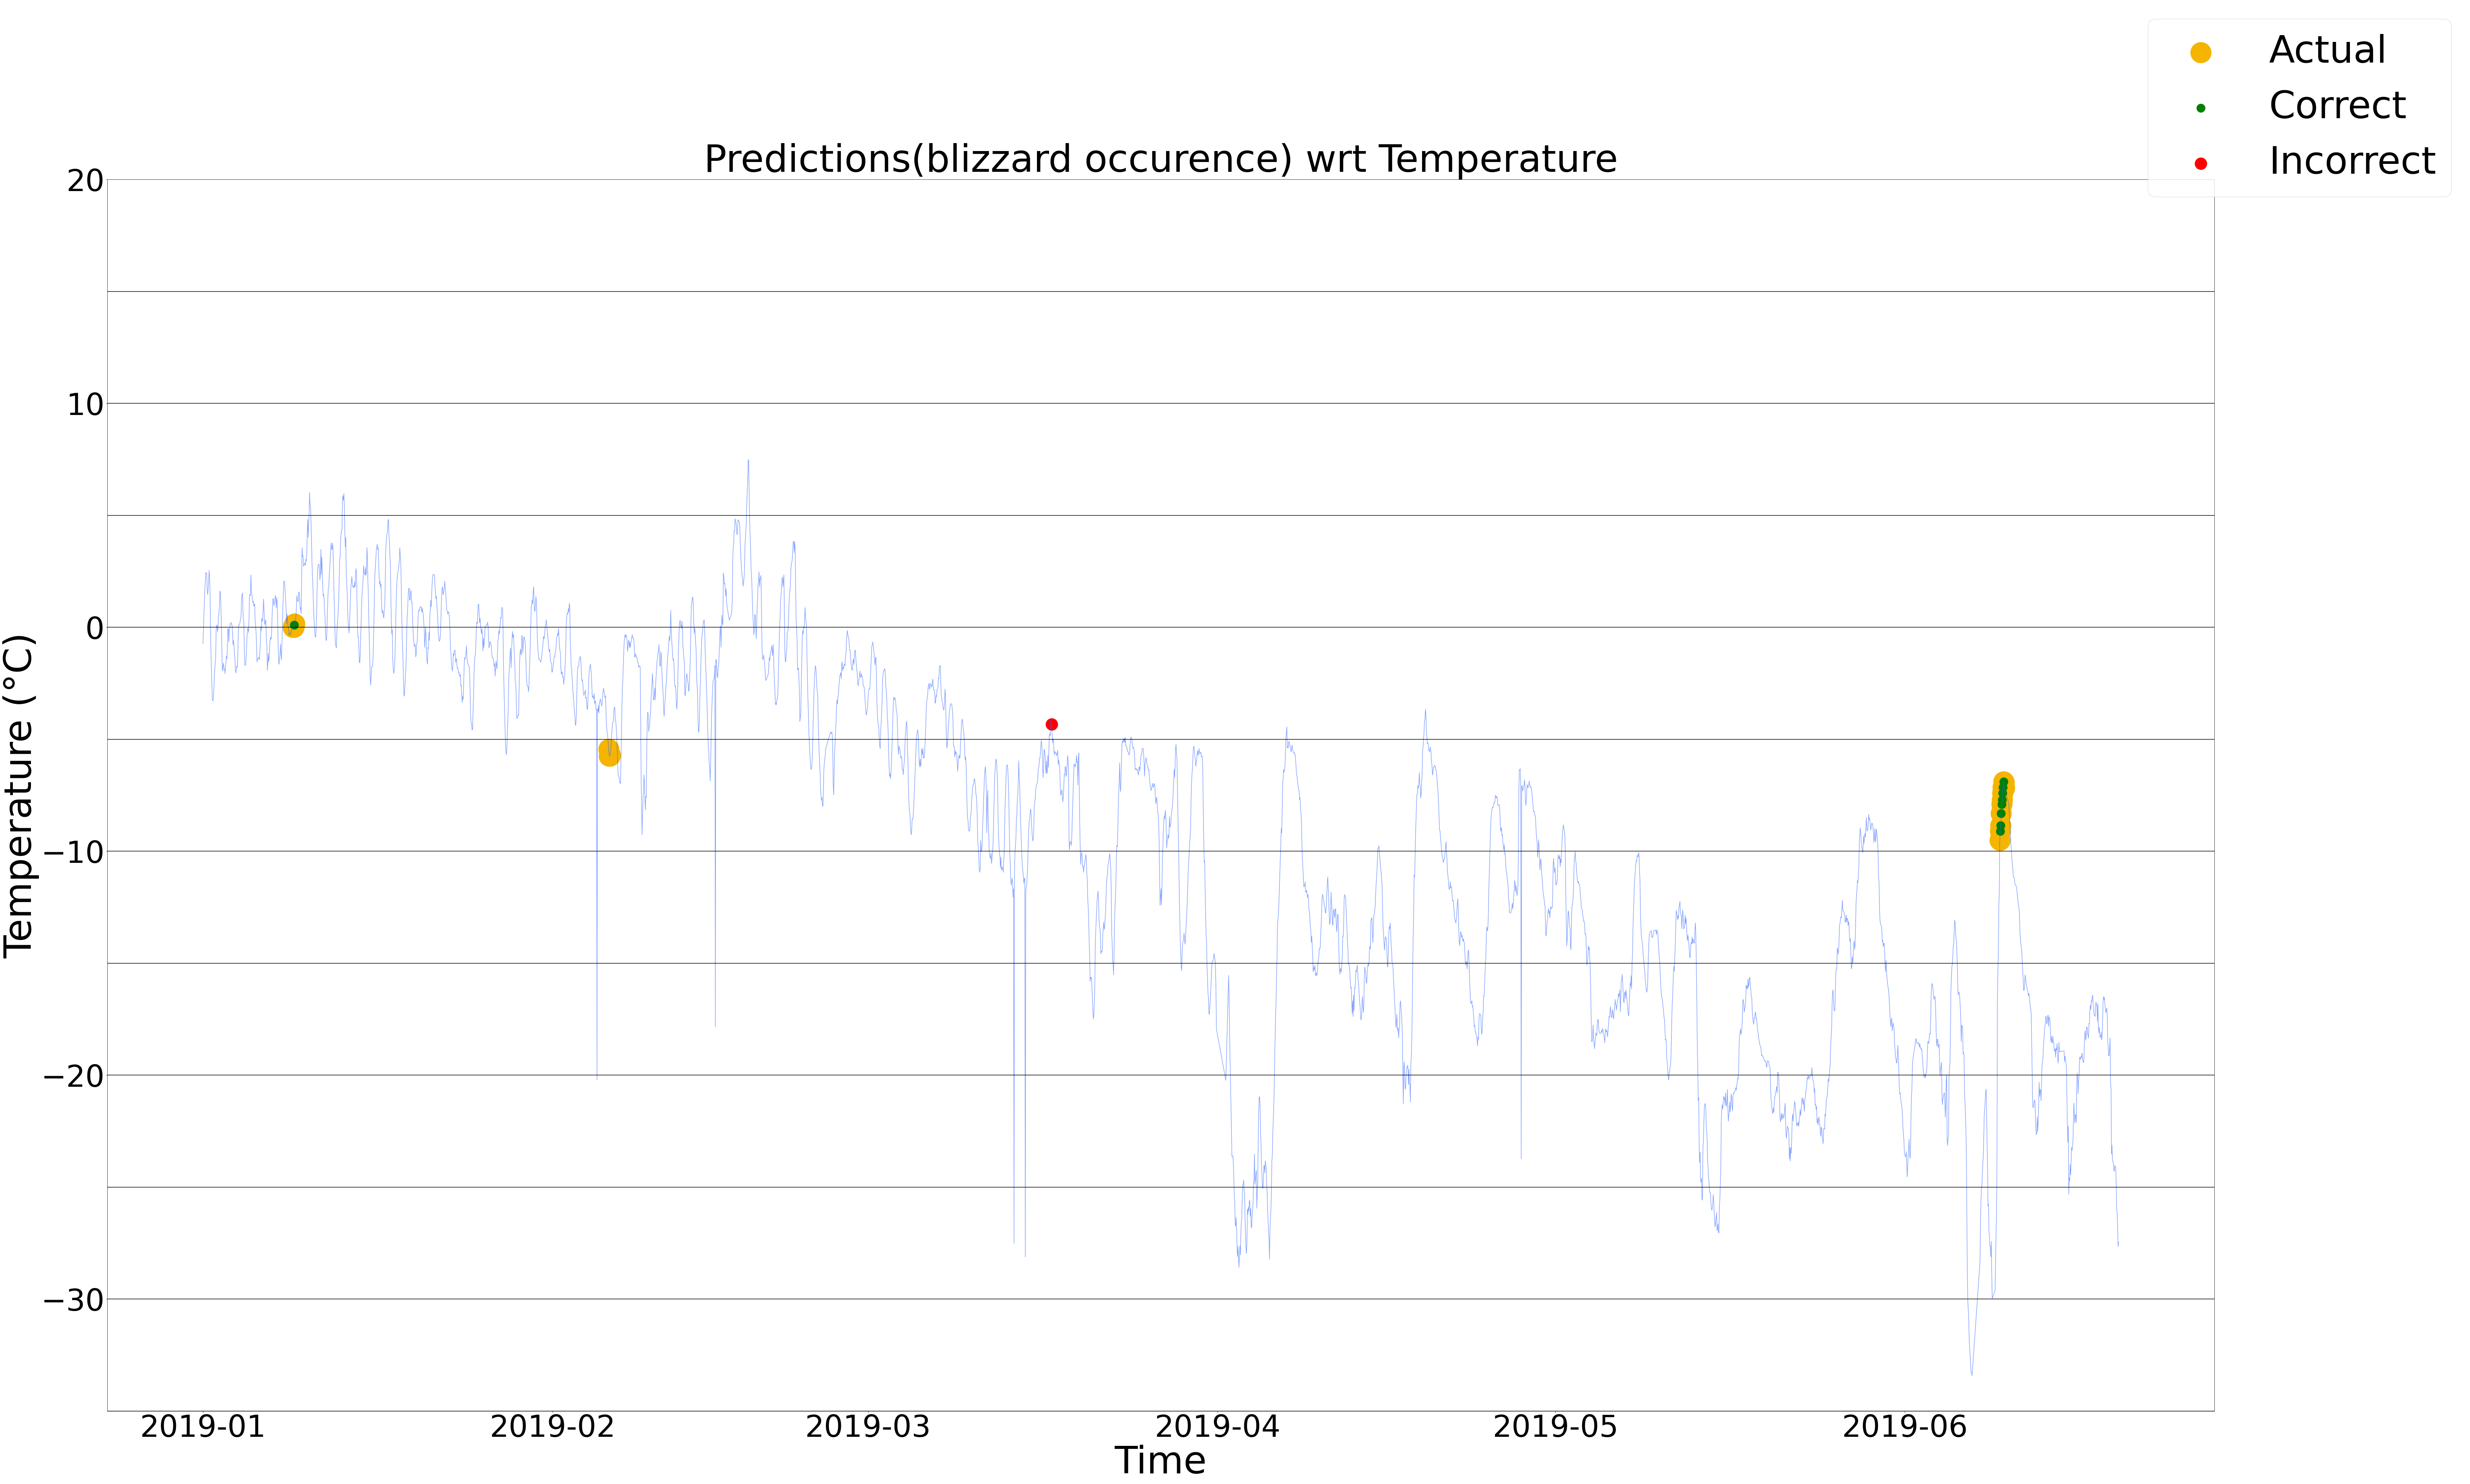

In [70]:
fig=plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize = (100,60))

ax1.plot(dfy.index,dfy.tempr,color = '#3366ff', alpha=0.6)
ax1.scatter(dfy[dfy['actual']==1].index,dfy[dfy['actual']==1]['tempr'],color = '#F4B400', s=3000, label='Actual')
ax1.scatter(dfy[dfy['result']=='correct'].index,dfy[dfy['result']=='correct']['tempr'],color = 'green', s=500, label='Correct')
ax1.scatter(dfy[dfy['result']=='incorrect'].index,dfy[dfy['result']=='incorrect']['tempr'],color = 'red', s=1000, label='Incorrect')

ax1.set_ylim(-35,20)

for i in range(-35,20,5):
  plt.axhline(y = i, c = 'black')


fig.legend(loc="upper right", fontsize = 100)
ax1.tick_params(labelsize=80)
ax1.set_title('Predictions(blizzard occurence) wrt Temperature', fontsize=100)
ax1.set_xlabel('Time', fontsize=100)
ax1.set_ylabel('Temperature (' + degree_sign + 'C)', fontsize=100)

# plt.savefig('Predictions(blizzard Occurence) wrt Wind Speed (CNN).png', bbox_inches = 'tight')
plt.show()

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

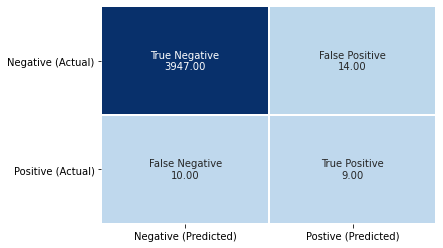

In [37]:
confudf = pd.DataFrame(confusion_matrix(y_test,y_pred), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(y_test,y_pred).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)

plt.yticks(rotation = 0)

In [37]:
dfy['actual'] = pd.to_numeric(dfy['actual'],downcast='signed')
dfy.head()

ws      ap     rh  tempr     wd  actual  pred result
obstime                                                                     
2019-01-01 00:00:00  19.12  982.55  35.65  -0.72  75.29       0     0     no
2019-01-01 01:00:00  19.78  982.30  32.88  -0.05  72.93       0     0     no
2019-01-01 02:00:00  20.50  981.97  31.19   0.61  71.25       0     0     no
2019-01-01 03:00:00  19.25  981.84  30.32   1.19  61.32       0     0     no
2019-01-01 04:00:00  19.19  981.65  30.38   1.74  55.35       0     0     no

In [40]:
dfy['date'] = dfy.index.map(lambda x : str(x).split()[0])
dfy['month']= dfy['date'].map(lambda x : x.split('-')[1])
dfy.tail()

ws      ap     rh  tempr      wd  actual  pred result  \
obstime                                                                         
2019-06-19 19:00:00   9.87  985.45  68.47 -26.06  178.30       0     0     no   
2019-06-19 20:00:00   9.72  986.18  68.88 -26.10  181.10       0     0     no   
2019-06-19 21:00:00   9.52  986.89  66.32 -26.75  178.45       0     0     no   
2019-06-19 22:00:00  10.82  987.76  64.92 -27.64  187.17       0     0     no   
2019-06-19 23:00:00  12.74  988.86  61.88 -27.46  190.50       0     0     no   

                           date month  
obstime                                
2019-06-19 19:00:00  2019-06-19    06  
2019-06-19 20:00:00  2019-06-19    06  
2019-06-19 21:00:00  2019-06-19    06  
2019-06-19 22:00:00  2019-06-19    06  
2019-06-19 23:00:00  2019-06-19    06

In [55]:
jan_dfy = dfy[dfy['month']=="05"]
jan_actual = np.array(jan_dfy['actual'])
jan_pred = np.array(jan_dfy['pred'])
confudf = pd.DataFrame(confusion_matrix(jan_actual,jan_pred), index = ["Negative (Actual)","Positive (Actual)"], columns=['Negative (Predicted)', 'Postive (Predicted)'])
text = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), confusion_matrix(jan_actual,jan_pred).flatten())])).reshape(2,2)

sns.heatmap(confudf, annot = labels, center=100, fmt='', linewidth = '1', vmax=300, cmap = "Blues", cbar=False)
plt.title("Confusion Matrix for June 2019")
plt.yticks(rotation = 0)

ws           ap          rh       tempr          wd  actual  \
count  742.000000   742.000000  742.000000  742.000000  742.000000   742.0   
mean    10.361240   988.955094   51.479394  -16.978679   82.574946     0.0   
std      5.518569     8.880082   11.958389    4.342842   40.228340     0.0   
min      0.540000   969.510000   34.140000  -27.050000   28.880000     0.0   
25%      6.185000   983.962500   42.430000  -20.687500   64.907500     0.0   
50%      9.600000   988.390000   47.440000  -17.085000   72.140000     0.0   
75%     13.787500   994.482500   58.995000  -13.562500   81.957500     0.0   
max     27.980000  1008.960000   83.990000   -8.350000  327.310000     0.0   

        pred  
count  742.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0